In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv('sonar.csv')

In [39]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


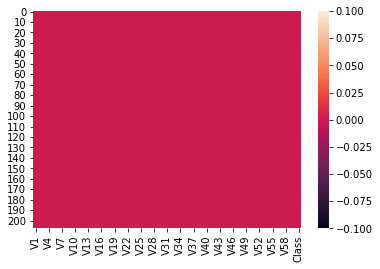

In [40]:
#To check null
sns.heatmap(df.isnull())

In [41]:
#No null value is present
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V57      0
V58      0
V59      0
V60      0
Class    0
Length: 61, dtype: int64

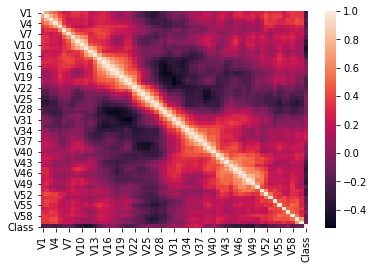

In [42]:
#Difficult to infer
dfcor=df.corr()
sns.heatmap(dfcor)

In [43]:
#Outliers may be present
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [44]:
#no outliers present
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df_new

(array([  2,   2,   2,   2,   2,   3,   3,   5,   5,  19,  19,  20,  21,
        22,  22,  22,  22,  22,  22,  22,  22,  33,  44,  44,  44,  65,
        85,  85,  87,  91,  91,  97,  97,  98,  98,  98,  98,  98,  98,
       101, 101, 105, 111, 111, 111, 112, 127, 127, 127, 129, 129, 129,
       131, 132, 132, 133, 133, 133, 134, 134, 134, 134, 135, 135, 135,
       135, 136, 136, 136, 136, 137, 137, 138, 138, 138, 140, 140, 140,
       140, 140, 141, 141, 142, 142, 142, 143, 143, 143, 144, 145, 145,
       146, 146, 146, 146, 146, 146, 146, 146, 146, 147, 147, 147, 147,
       147, 147, 147, 147, 161, 184, 186, 186, 186], dtype=int64), array([ 8,  9, 10, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41,
       46, 47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,
        1,  2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12,
       53,  0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,
        8, 51,  9, 10,  2, 47, 51, 45, 46, 48, 49, 50, 4

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [45]:
df.shape

(208, 61)

In [46]:
df_new.shape

(168, 61)

In [47]:
df.skew()

V1       2.131088
V2       2.155644
V3       2.652518
V4       3.401697
V5       2.018141
           ...   
V57      1.653090
V58      2.098330
V59      1.737506
V60      2.775754
Class    0.135903
Length: 61, dtype: float64

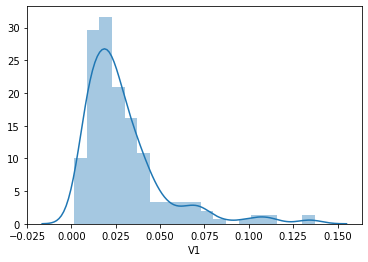

In [48]:
sns.distplot(df['V1'])

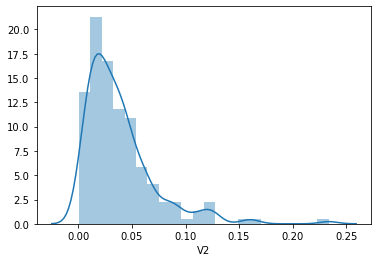

In [49]:
sns.distplot(df['V2'])

In [ ]:
sns.pairplot(df)

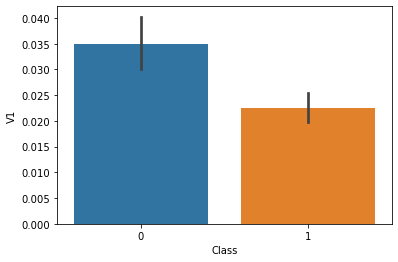

In [50]:
sns.barplot(x='Class',y='V1',data=df)

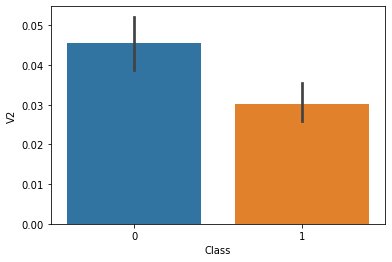

In [51]:
sns.barplot(x='Class',y='V2',data=df)

In [52]:
# remove skewness
import numpy as np
from sklearn.preprocessing import power_transform
pt=power_transform(df,method='yeo-johnson')
new=pd.DataFrame(pt,columns=df.columns)# converting into dataframe

In [53]:
new.skew()

V1       0.200661
V2       0.196446
V3       0.187103
V4       0.190001
V5       0.140451
           ...   
V57      0.200251
V58      0.220689
V59      0.166418
V60      0.204745
Class    0.135903
Length: 61, dtype: float64

In [54]:
x=df.iloc[ :,0:-1]
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [55]:
y=df.iloc[ :,60]
y

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: Class, Length: 208, dtype: int64

In [56]:
x.shape

(208, 60)

In [57]:
y.shape

(208,)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [61]:
x_train.shape

(139, 60)

In [62]:
x_test.shape

(69, 60)

In [63]:
y_train.shape

(139,)

In [64]:
y_test.shape

(69,)

In [65]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy score",accuracy_score(y_test,pred))
print("confusion matrix",confusion_matrix(y_test,pred))
print("classification report",classification_report(y_test,pred))

accuracy score 0.8260869565217391
confusion matrix [[34  4]
 [ 8 23]]
classification report               precision    recall  f1-score   support

           0       0.81      0.89      0.85        38
           1       0.85      0.74      0.79        31

    accuracy                           0.83        69
   macro avg       0.83      0.82      0.82        69
weighted avg       0.83      0.83      0.82        69



LG score:82.6

In [66]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LogisticRegression(),x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.45238095 0.76190476 0.61904762 0.82926829 0.48780488]
0.6300813008130082 0.14764458612841536


In [70]:
#roc curve for logistic reggression 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [71]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [72]:
y_pred_prob

array([0.3609526 , 0.78601789, 0.56953727, 0.78686233, 0.34135471,
       0.48587684, 0.39905578, 0.48244184, 0.82899188, 0.2654106 ,
       0.13138375, 0.55119571, 0.49482664, 0.03771776, 0.26862639,
       0.1856476 , 0.20715891, 0.42976597, 0.35597166, 0.63352372,
       0.23417005, 0.47652143, 0.46063158, 0.42155165, 0.80155362,
       0.6359571 , 0.87426174, 0.60793015, 0.14885489, 0.03568917,
       0.27205329, 0.63004846, 0.910248  , 0.35583593, 0.0830544 ,
       0.46026513, 0.41182036, 0.56331472, 0.55233795, 0.39730732,
       0.93261569, 0.55224964, 0.73965686, 0.30409135, 0.90602074,
       0.3228979 , 0.47112741, 0.28279425, 0.80110196, 0.91692467,
       0.72927024, 0.14127672, 0.403517  , 0.11762482, 0.49262386,
       0.44422941, 0.04129712, 0.53600815, 0.71868707, 0.44217129,
       0.48163112, 0.29854456, 0.45933001, 0.10034609, 0.50151925,
       0.44404994, 0.74502251, 0.5938194 , 0.53629111])

In [73]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [74]:
fpr

array([0.        , 0.        , 0.        , 0.02631579, 0.02631579,
       0.05263158, 0.05263158, 0.13157895, 0.13157895, 0.15789474,
       0.15789474, 0.28947368, 0.28947368, 0.42105263, 0.42105263,
       0.5       , 0.5       , 0.55263158, 0.55263158, 0.86842105,
       0.86842105, 1.        ])

In [77]:
tpr

array([0.        , 0.03225806, 0.64516129, 0.64516129, 0.67741935,
       0.67741935, 0.74193548, 0.74193548, 0.80645161, 0.80645161,
       0.83870968, 0.83870968, 0.87096774, 0.87096774, 0.90322581,
       0.90322581, 0.93548387, 0.93548387, 0.96774194, 0.96774194,
       1.        , 1.        ])

In [78]:
threshold

array([1.93261569, 0.93261569, 0.56953727, 0.56331472, 0.55233795,
       0.55224964, 0.53629111, 0.49482664, 0.48587684, 0.48244184,
       0.48163112, 0.45933001, 0.44422941, 0.41182036, 0.403517  ,
       0.3609526 , 0.35597166, 0.34135471, 0.3228979 , 0.13138375,
       0.11762482, 0.03568917])

Text(0, 0.5, 'LPR')

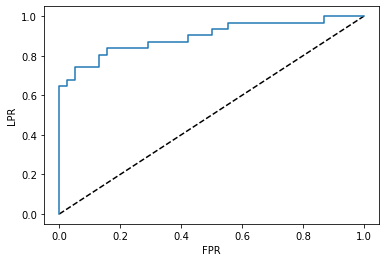

In [94]:
# less area covered
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LR')
plt.xlabel('FPR')
plt.ylabel('LPR')

In [80]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [81]:
print(auc_score)

0.8183361629881155


In [87]:
#PCA more number of columns
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)

In [90]:
#from 60 colums reduced to 10
x.shape

(208, 10)

In [93]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277
...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120
